# Test social network
In which we test for the existence of a coherent social network structure within and among the Facebook groups to determine if we could simply convert each group to a high-dimensional embedding, following the [LINE](https://arxiv.org/pdf/1503.03578.pdf) procedure.

We define the social network $G=\{V,E\}$ where an edge $e$ is drawn between groups $v_{1}$ and $v_{2}$ if a user $u$ cross-posts at least once between $v_{1}$ and $v_{2}$.

In [12]:
import networkx as nx
import pandas as pd
import os
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [3]:
all_group_data = pd.read_csv('../../data/facebook-maria/combined_group_data.tsv', sep='\t', index_col=False, encoding='utf-8')
print(all_group_data.head())

          group_id   status_author_id  \
0  351272391991842  10159623474155515   
1  351272391991842  10155877836122783   
2  351272391991842  10215020607489848   
3  351272391991842   1716175958400853   
4  351272391991842    141039043205101   

                                      status_message status_lang  
0  Estoy preocupada por mi tia vicky vazquez que ...          es  
1  Para alguien que lo necesite... Dale Share..A ...          es  
2       One unsafe well in Dorado on Carr 694 km 4.5          en  
3  En apoyo al alcalde Carlos Lopez y al municipi...          es  
4  Pueblo de Puerto Rico no se monten en las gran...          es  


## Build graph
Let's build a bipartite graph between group ID and author ID.

In [8]:
from itertools import izip
G = nx.Graph()
for g_id, a_id in izip(all_group_data.loc[:, 'group_id'], all_group_data.loc[:, 'status_author_id']):
    if(not G.has_node(g_id)):
        G.add_node(g_id, node_type='group')
    if(not G.has_node(a_id)):
        G.add_node(a_id, node_type='author')
    if(not G.has_edge(g_id, a_id)):
        G.add_edge(g_id, a_id, weight=1)

In [10]:
print('%d nodes %d edges'%(G.number_of_nodes(), G.number_of_edges()))

12786 nodes 13758 edges


What does the graph look like?

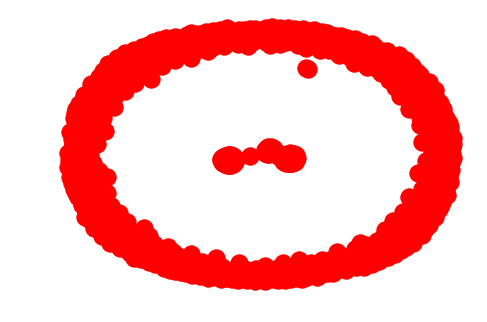

In [14]:
# need sample!! can't draw whole graph lol
pd.np.random.seed(123)
sample_size = 1000
G_sample_nodes = pd.np.random.choice(G.nodes(), size=sample_size, replace=False)
G_sample = G.subgraph(G_sample_nodes)
nx.draw(G_sample)
plt.show()

Pretty messy. Maybe computing the usual network metrics will help us out!

In [22]:
?plt.hist

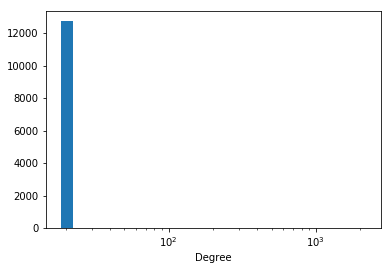

In [28]:
# degree distribution
degs = G.degree(G.nodes())
deg_vals = pd.Series([d[1] for d in degs])
plt.hist(deg_vals, bins=len(set(deg_vals)), rwidth=0.1)
plt.xscale('log')
plt.xlabel('Degree')
plt.show()

Yikes! Looks like most nodes have a low degree.

In [29]:
print(deg_vals.value_counts())

1       11920
2         696
3          75
4          28
5           5
6           4
9           3
12          2
25          2
8           2
39          2
24          2
7           2
330         1
43          1
19          1
40          1
56          1
978         1
458         1
338         1
552         1
218         1
50          1
18          1
120         1
379         1
257         1
2184        1
49          1
75          1
487         1
467         1
683         1
159         1
119         1
103         1
23          1
1158        1
734         1
190         1
94          1
54          1
38          1
14          1
229         1
157         1
93          1
13          1
572         1
284         1
212         1
28          1
20          1
175         1
1291        1
dtype: int64


How does the macro structure look?

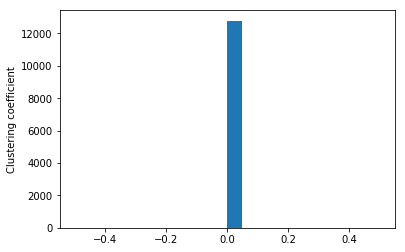

In [33]:
# clustering coefficient
G_cluster = nx.clustering(G)
G_cluster_vals = pd.Series(G_cluster)
plt.hist(G_cluster_vals, bins=20)
plt.ylabel('Clustering coefficient')
plt.show()

In [34]:
print(G_cluster_vals.value_counts())

0    12786
dtype: int64


No clustering. 

Is the graph a connected component?

In [36]:
G_comp = list(nx.connected_components(G))
print(len(G_comp))

7


In [38]:
for i, G_c in enumerate(G_comp):
    print('%d nodes in component %d'%(len(G_c), i))

12766 nodes in component 0
5 nodes in component 1
5 nodes in component 2
2 nodes in component 3
3 nodes in component 4
3 nodes in component 5
2 nodes in component 6


Wow! Which groups tend to be connected?

We'll need to project the graph.

In [44]:
node_types = nx.get_node_attributes(G, 'node_type')
group_nodes = filter(lambda n: node_types[n]=='group', G.nodes())
G_projected = nx.projected_graph(G, group_nodes)
print(G_projected.number_of_nodes())
print(G_projected.number_of_edges())

60
542


In [58]:
group_locations = pd.read_csv('../../data/facebook-maria/location_group_data.tsv', sep='\t', index_col=False)
group_location_lookup = dict(zip(group_locations.loc[:, 'group_id'], group_locations.loc[:, 'location_name']))
# unicode stuff
group_location_lookup = {k : v.decode('utf-8') for k,v in group_location_lookup.iteritems()}

In [77]:
?nx.draw_networkx_labels

In [80]:
projected_deg

DegreeView({1988415758095382: 37, 486819048360070: 19, 505778186467207: 5, 128909594424200: 24, 311739902631820: 26, 1548641381825933: 1, 105121436871597: 0, 119087272129297: 37, 352124068563860: 2, 1909452959306518: 12, 803659183149847: 18, 1732562527048857: 24, 1723084327997466: 28, 1815374475420954: 26, 889808494515226: 19, 871880559633183: 3, 132392547395104: 31, 891721064308258: 32, 132963337341347: 34, 1972572999632293: 40, 1453581968094172: 21, 130010134396359: 14, 228066954387757: 24, 130913387550000: 35, 142680509678003: 21, 1961676614046008: 20, 1773209126315380: 33, 118787682128186: 26, 1390525734396603: 5, 117224992282301: 13, 1724474021195839: 25, 239379013253824: 24, 173314876566851: 0, 119987445374151: 9, 1945917302354700: 5, 1106549189385804: 4, 351272391991842: 30, 247192592473869: 0, 1201507393289356: 2, 119132632075224: 11, 117529462276443: 1, 721270821393500: 36, 1306772706118778: 25, 132022090761950: 28, 727610640755618: 3, 301495306993376: 3, 844368579056187: 17, 

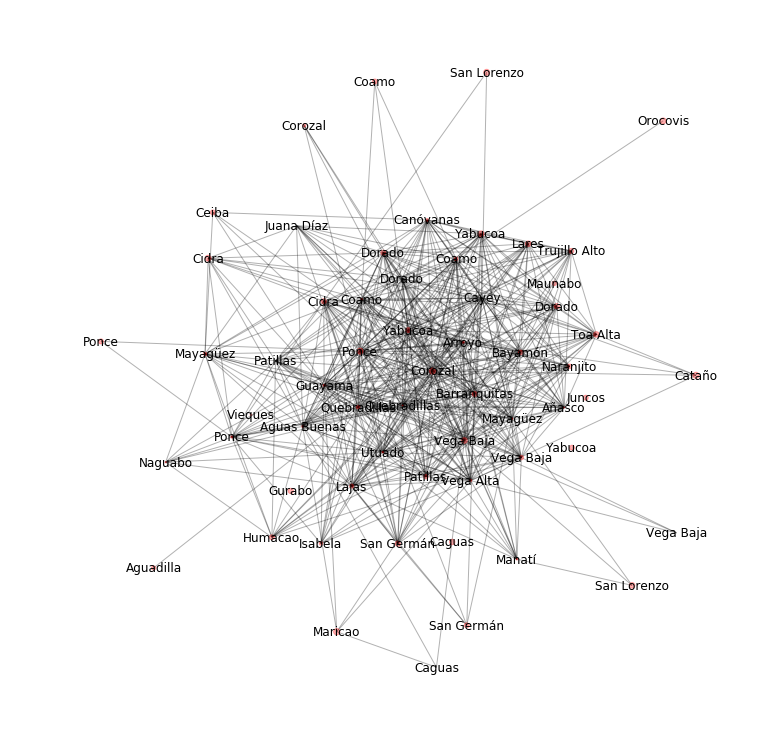

In [82]:
# draw graph
projected_deg = G_projected.degree(group_nodes)
node_size = [projected_deg[g] for g in group_nodes]
node_color = 'r'
alpha = 0.3
font_color = 'k'
label_size = 12
label_dict = {k:v for k,v in group_location_lookup.iteritems() if k in group_nodes}
# need more spread!!
plt.figure(figsize=(10,10))
# draw full graph
G_spots = nx.kamada_kawai_layout(G_projected)
nx.draw_kamada_kawai(G_projected, node_size=node_size, node_color=node_color, 
                     alpha=alpha, font_color=font_color)
nx.draw_networkx_labels(G_projected, G_spots, labels=label_dict, font_size=label_size)
plt.show()
# draw just the nodes
# looks bad don't do it
# G_spots = nx.kamada_kawai_layout(G_projected)
# plt.figure(figsize=(10,10))
# nx.draw_networkx_nodes(G_projected, pos=G_spots, node_size=node_size, node_color=node_color,
#                        labels=label_dict, font_color=font_color)
# plt.show()

Sanity check: most groups that point to same location tend to cluster together.

- `Ponce`
- `Vega Baja`
- `San Germán`
- `Dorado`

Some geographical similarity:

- `Vega Baja` is near `Vega Alta`
- `Coamo` is near `Cayey`
- `Patillas` is near `Guayama`
- `Lajas` is near `San Germán`

But also some outliers!

- `Humacao` far east of `Mayaguëz`
- `San Lorenzo` far southeast of `Manatí`

## Test mining for user ID
Old code for trying to mine for user IDs.

In [24]:
import sys
if('facebook-page-post-scraper/' not in sys.path):
    sys.path.append('facebook-page-post-scraper/')
from get_fb_posts_fb_group import getFacebookPageFeedUrl, request_until_succeed

In [37]:
auth_info = pd.read_csv('../../data/facebook_auth.csv', header=None, index_col=0)
# access_token = auth_info.loc['access_token']
access_token = auth_info.loc['app_id'].values[0] + "|" + auth_info.loc['app_secret'].values[0]
group_id = 1773209126315380
since_date = '2017-09-20'
until_date = '2017-10-20'
paging = ''
base = "https://graph.facebook.com/v2.9"
node = "/{}/feed".format(group_id)
parameters = "/?limit={}&access_token={}".format(100, access_token)
since = "&since={}".format(since_date) if since_date \
    is not '' else ''
until = "&until={}".format(until_date) if until_date \
    is not '' else ''

In [39]:
import json
until = '' if until is '' else "&until={}".format(until)
paging = '' if until is '' else "&__paging_token={}".format(paging)
base_url = base + node + parameters + since + until + paging
url = getFacebookPageFeedUrl(base_url)
statuses = json.loads(request_until_succeed(url))